# Задача: Анализ данных об обиженных пользователях 210107070 Zaka

У вас есть CSV-файл с данными о пользователях и их обидах. Вам нужно использовать библиотеку Pandas, чтобы проанализировать эти данные и ответить на несколько вопросов.

Данные:
Файл obijenka_data.csv содержит следующие столбцы:

User_ID - уникальный идентификатор пользователя.
User_Name - имя пользователя.
Age - возраст пользователя.
Complaint - описание обиды пользователя.
Date - дата, когда обида была зарегистрирована.

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('complaints.csv')
df.head()

,id,name,age,complaint,date
0,1,John,25,несправедливо,2023-09-01
1,2,Alice,30,Плохое обслуживание,2023-09-02
2,3,Bob,28,несправедливо,2023-09-03
3,4,Eve,35,Долгая очередь,2023-09-03
4,1,John,22,несправедливо,2023-07-05


In [3]:
# Какой средний возраст пользователей, обидевшихся?
average_age = df['age'].mean()
print(f'Средний возраст пользователей, обидевшихся: {average_age:.2f} лет')

Средний возраст пользователей, обидевшихся: 30.40 лет


In [4]:
print(df.to_string())

    id    name  age                  complaint        date
0    1    John   25              несправедливо  2023-09-01
1    2   Alice   30        Плохое обслуживание  2023-09-02
2    3     Bob   28              несправедливо  2023-09-03
3    4     Eve   35             Долгая очередь  2023-09-03
4    1    John   22              несправедливо  2023-07-05
5    6   David   40       Несправедливый штраф  2023-09-06
6    2   Alice   29  Отсутствие обратной связи  2023-08-07
7    8   Grace   27             Пропажа товара  2023-09-08
8    3     Bob   33         Поврежденный товар  2023-09-09
9    2   Alice   24          Задержка доставки  2023-09-10
10   1    John   31      Некорректное обещание  2023-09-11
11  12    Kate   26              Неверный счет  2023-10-12
12  13    Liam   23              несправедливо  2023-05-13
13  14     Mia   32           Потерянный заказ  2023-09-14
14  15    Noah   34   Недостаточная информация  2023-09-15
15   2   Alice   36         Неприятное общение  2023-09-

In [5]:
# Какая самая часто встречающаяся дата обиды?
most_common_date = df['date'].mode()[0]
print(f'Самая часто встречающаяся дата обиды: {most_common_date}')

Самая часто встречающаяся дата обиды: 2023-09-03


In [6]:
total_records = len(df)
print(total_records)

20


In [7]:
# Какой пользователь (по имени) зарегистрировал максимальное количество обид?
user_with_most_complaints = df['name'].value_counts().idxmax()
print(f'Пользователь с максимальным количеством обид: {user_with_most_complaints}')

Пользователь с максимальным количеством обид: Alice


In [8]:
# Какой процент обид содержит фразу "несправедливо"?
phrase='несправедливо'
complaints_phrase = df[df['complaint'].str.contains(phrase, case=True)]
percent_phrase = (len(complaints_phrase) / total_records * 100)
print(f'Процент обид, содержащих фразу "{phrase}": {percent_phrase:.2f}%')

Процент обид, содержащих фразу "несправедливо": 20.00%


In [9]:
# Создайте новый столбец Month, который содержит номер месяца (1-12) для каждой даты обиды.
df['Month'] = pd.to_datetime(df['date']).dt.month
print(df.head())

   id   name  age            complaint        date  Month
0   1   John   25        несправедливо  2023-09-01      9
1   2  Alice   30  Плохое обслуживание  2023-09-02      9
2   3    Bob   28        несправедливо  2023-09-03      9
3   4    Eve   35       Долгая очередь  2023-09-03      9
4   1   John   22        несправедливо  2023-07-05      7


# Подзадачи по визуализации данных:

Используя библиотеку Matplotlib или Seaborn, создайте визуализации для следующих вопросов:

a. Постройте гистограмму возрастов пользователей.

b. Создайте столбчатую диаграмму, показывающую количество обид, зарегистрированных каждым пользователем.

c. Постройте круговую диаграмму, отображающую процент обид, содержащих фразу "несправедливо" по сравнению с общим числом обид.

d. Создайте линейный график, показывающий количество обид, зарегистрированных в каждом месяце.

Добавьте заголовки, метки осей и легенду (при необходимости) к вашим графикам, чтобы сделать их информативнее.

Сохраните созданные визуализации в отдельных файлах (например, age_histogram.png, complaints_per_user.png, и так далее).

Включите в отчет (или комментарии к коду) краткое описание каждой визуализации и выводы, которые можно сделать из данных.

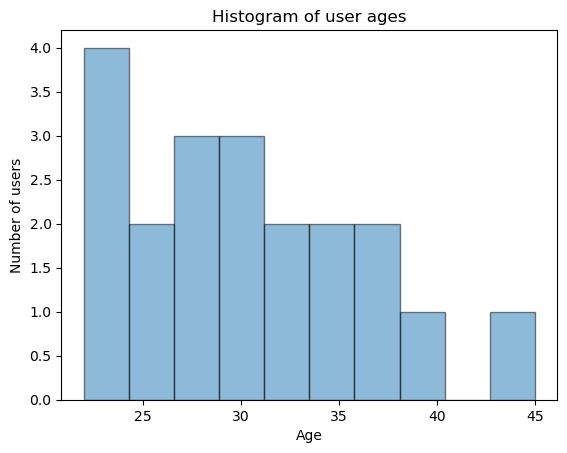

In [10]:
# Постройте гистограмму возрастов пользователей.
import matplotlib.pyplot as plt 

plt.hist(df['age'], bins=10, edgecolor='black', alpha=0.5)
plt.title('Histogram of user ages')
plt.xlabel('Age')
plt.ylabel('Number of users')
plt.savefig('age_hist.png')
plt.show()

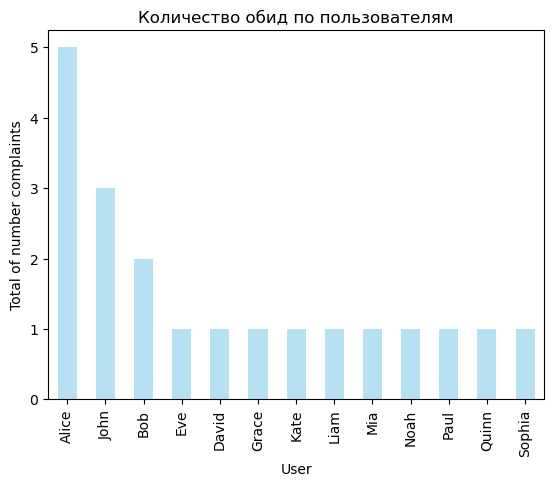

In [11]:
# Столбчатая диаграмма количества обид по пользователям
complaint_per_user = df['name'].value_counts()
complaint_per_user.plot(kind='bar', color='skyblue', alpha=0.6)
plt.title('Количество обид по пользователям')
plt.xlabel('User')
plt.ylabel('Total of number complaints')
plt.savefig('count_complaints.png')
plt.show()

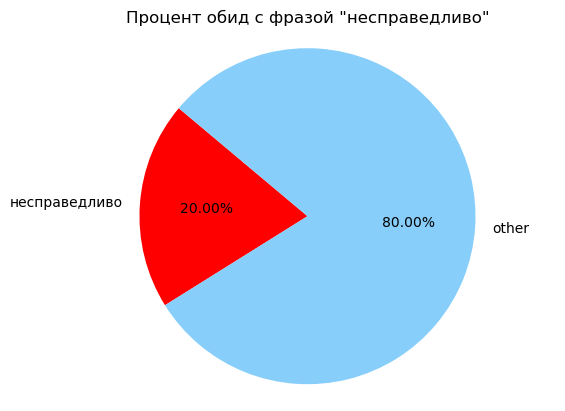

In [12]:
# Постройте круговую диаграмму, отображающую процент обид, содержащих фразу "несправедливо" по сравнению с общим числом обид.
complaints_with_unfair = df[df['complaint'].str.contains('несправедливо')]
complaints_without_unfair = df[~df['complaint'].str.contains('несправедливо')]

labels = ["несправедливо", "other"]
sizes = [len(complaints_with_unfair), len(complaints_without_unfair)]
colors = ['r', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
plt.axis('equal') # Другими словами, это гарантирует, что оси x и y имеют одинаковый масштаб, что делает график идеальным кругом, если это круговая диаграмма.
plt.title('Процент обид с фразой "несправедливо"')
plt.savefig('unfair_pie.png')
plt.show()

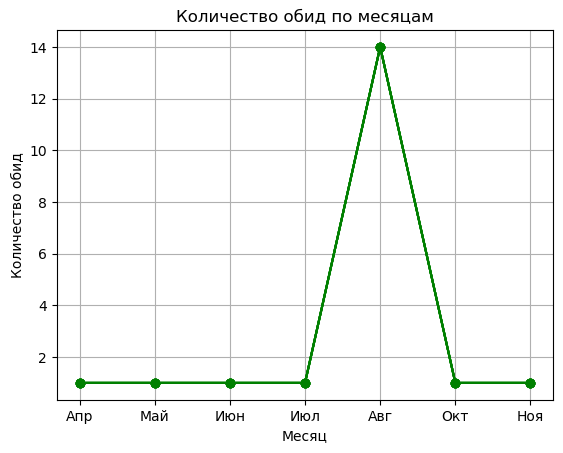

In [13]:
# Создайте линейный график, показывающий количество обид, зарегистрированных в каждом месяце
complaints_by_month = df.groupby(pd.to_datetime(df['date']).dt.month).count()

months = ['Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Окт', 'Ноя']

plt.plot(months, complaints_by_month, marker='o', linestyle='-', color='green', markersize=6)
plt.title('Количество обид по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество обид')
plt.grid(True)
plt.savefig('complaints_by_month_line.png')
plt.show()